In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.spatial import Delaunay

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot
from plotly.subplots import make_subplots

from tqdm import tqdm

# Загрузка и предобработка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Введите полный путь до файла Kurgan_finds_st.xls на вашем гугл диске: "/content/drive/ ..."
path = "/content/drive/MyDrive/ColabNotebooks/Archaeology_of_the_settlement_site/data/Kurgan_tabl_fin_dlya_stati.xlsx"
# path = "~/My_Google_Drive/ColabNotebooks/Archaeology_of_the_settlement_site/data/Kurgan_tabl_fin_dlya_stati.xlsx"
df = pd.read_excel(path)
df

а  кв.   x(мм)   y(мм)  h(мм)                     слой кол-во  \
0         1   AI -3880.0 -3050.0  310.0  темный слой с угольками    NaN   
1         5  CII  1300.0  2840.0  320.0  темный слой с угольками    NaN   
2         6  BII  -810.0 -1720.0  140.0  темный слой с угольками    NaN   
3         7  BII   740.0 -1600.0  110.0  темный слой с угольками    NaN   
4         8  BII   600.0 -1400.0  100.0  темный слой с угольками    NaN   
...     ...  ...     ...     ...    ...                      ...    ...   
4885  939-2   b1 -1400.0  -660.0  -40.0                      NaN    2шт   
4886  940-1   b1 -1070.0 -1220.0  -50.0                      NaN    NaN   
4887  940-2   b1 -1070.0 -1220.0  -50.0                      NaN    NaN   
4888  962-1   A2 -1140.0  -710.0  -90.0                      NaN    NaN   
4889  962-2   A2 -1140.0  -710.0  -90.0                      NaN    NaN   

     материал НОВЫЙ ТИП СЫРЬЯ категория 1 уровень  ...  \
0     кремень              5А  отходы расщепления  ...   
1     кремень              14  отходы расщепления  ...   
2     кремень              5А  отходы расщепления  ...   
3     кремень               9  отходы расщепления  ...   
4     кремень              5А              орудие  ...   
...       ...             ...                 ...  ...   
4885  кремень              5А  отходы расщепления  ...   
4886  кремень              5А  отходы расщепления  ...   
4887  кремень              5А  отходы расщепления  ...   
4888  кремень              5А             чешуйка  ...   
4889  кремень              5А             чешуйка  ...   

        Тип орудия каменного вид орудия/заготовки Температурное воздействие  \
0                        NaN                  2.3                       NaN   
1                        NaN                  NaN                       NaN   
2                        NaN                    2                       NaN   
3                        NaN                  3.5                       NaN   
4     ретушный резец двойной                    1                       NaN   
...                      ...                  ...                       ...   
4885                     NaN                    3                       NaN   
4886                     NaN                  2.3                       NaN   
4887                     NaN                  2.3                       NaN   
4888                     NaN                    3                       NaN   
4889                     NaN                    3                       NaN   

     примечание ремонтаж Unnamed: 19 x (без пересч) y (без пересч)  \
0                    NaN         NaN           94.0         -145.0   
1                    NaN         NaN           63.0         -160.0   
2                    NaN         NaN           63.0         -160.0   
3                    NaN         NaN          110.0         -210.0   
4                    NaN         NaN           78.0           77.0   
...                  ...         ...            ...            ...   
4885                 NaN         NaN          110.0          199.0   
4886                 NaN         NaN            NaN            NaN   
4887                 NaN         NaN           63.0          112.0   
4888                 NaN         NaN            NaN            NaN   
4889                 NaN         NaN          110.0           71.0   

     h без пересчета Unnamed: 23 Unnamed: 24  
0                4.0         NaN         NaN  
1                4.0         NaN         NaN  
2                4.0         NaN         NaN  
3                8.0         NaN         NaN  
4                6.0         NaN         NaN  
...              ...         ...         ...  
4885             6.0         NaN         NaN  
4886             NaN         NaN         NaN  
4887           143.0         NaN         NaN  
4888             NaN         NaN         NaN  
4889           130.0         NaN         NaN  

[4890 rows x 25 columns]

## Общая корректировка признаков

In [ ]:
df.rename(columns={
            "ТЕРМИЧЕСКОЕ ВОЗДЕЙСТВИЕ" : "термическое воздействие",
            "НОВЫЙ ТИП СЫРЬЯ" : "новый тип сырья"
          },
          inplace=True)
df.head(5)

а  кв.   x(мм)   y(мм)  h(мм)                     слой кол-во материал  \
0  1   AI -3880.0 -3050.0  310.0  темный слой с угольками    NaN  кремень   
1  5  CII  1300.0  2840.0  320.0  темный слой с угольками    NaN  кремень   
2  6  BII  -810.0 -1720.0  140.0  темный слой с угольками    NaN  кремень   
3  7  BII   740.0 -1600.0  110.0  темный слой с угольками    NaN  кремень   
4  8  BII   600.0 -1400.0  100.0  темный слой с угольками    NaN  кремень   

  новый тип сырья категория 1 уровень  ...    Тип орудия каменного  \
0              5А  отходы расщепления  ...                     NaN   
1              14  отходы расщепления  ...                     NaN   
2              5А  отходы расщепления  ...                     NaN   
3               9  отходы расщепления  ...                     NaN   
4              5А              орудие  ...  ретушный резец двойной   

  вид орудия/заготовки Температурное воздействие примечание ремонтаж  \
0                  2.3                       NaN                 NaN   
1                  NaN                       NaN                 NaN   
2                    2                       NaN                 NaN   
3                  3.5                       NaN                 NaN   
4                    1                       NaN                 NaN   

  Unnamed: 19 x (без пересч) y (без пересч) h без пересчета Unnamed: 23  \
0         NaN           94.0         -145.0             4.0         NaN   
1         NaN           63.0         -160.0             4.0         NaN   
2         NaN           63.0         -160.0             4.0         NaN   
3         NaN          110.0         -210.0             8.0         NaN   
4         NaN           78.0           77.0             6.0         NaN   

  Unnamed: 24  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 25 columns]

In [ ]:
df = df.astype({'h(мм)': float})
df['термическое воздействие'] = df['термическое воздействие'].fillna('Нет')

Посмотрим на распределение пустых полей:

In [ ]:
with pd.option_context('display.float_format', '{:,.1f}%'.format):
    print(df.isnull().mean() * 100)

а                                               0.0%
кв.                                             0.6%
x(мм)                                           0.7%
y(мм)                                           0.7%
h(мм)                                           0.7%
слой                                           14.5%
кол-во                                         29.6%
материал                                        0.6%
новый тип сырья                                 0.0%
категория 1 уровень                             0.0%
категория отдельная для пластинчатых сколов    78.1%
термическое воздействие                         0.0%
КАТЕГОРИЯ                                       0.0%
ФРАГМЕНТ                                       88.6%
ВИД ОТЩЕПА (РАЗМЕР)                            37.5%
Тип орудия каменного                           99.7%
вид орудия/заготовки                           33.5%
Температурное воздействие                      98.5%
примечание ремонтаж                           

## Повторяющиеся названия

### Термическое воздействие

In [ ]:
df['термическое воздействие'].value_counts()

термическое воздействие
Нет         3611
да          1259
+             13
0              2
10А- дп        2
дп             1
средний        1
да+            1
Name: count, dtype: int64

In [ ]:
df['термическое воздействие'] = df['термическое воздействие'].replace({
    'ДА': 'Да',
    'да': 'Да',
    '+': 'Да',
    0: 'Нет',
    '10А- дп ': 'Нет',
    'дп': 'Да',
    'средний': 'Да',
    'да+': 'Да'
})

In [ ]:
df['термическое воздействие'].value_counts()

термическое воздействие
Нет    3615
Да     1275
Name: count, dtype: int64

### Слой

In [ ]:
df['слой'].value_counts(dropna=False)

слой
палево-желтый песок                                 2598
NaN                                                  708
желтый песок                                         444
слой палево-желтого песка                            297
слой желтого песка                                   266
граница серо-желтого и палево-желтого песка          131
пепельный слой                                        95
низ пепельного слоя                                   86
темный слой с угольками                               79
граница пепельного и серо-желтого песка               31
граница пепельного песка и серо-желтого песка         26
желтое пятно                                          18
серый, пятно                                          18
серое пятно                                           17
граница серо-черного песка и желтого песка            17
под дерном                                            12
корневая яма                                          10
граница пепельного слоя и серо-желтого песка           9
слой палево-желтого песка и граница серо-желтого       6
заполнение ямы                                         5
серо-желтый песок                                      5
слой серо-черного песка                                4
серый песок                                            3
темное пятно                                           2
бордовое пятно                                         1
под склоном                                            1
дерн низ                                               1
Name: count, dtype: int64

Видим несколько названий для одного и того же слоя. Исправим это:

In [ ]:
df['слой'] = df['слой'].replace({
    'слой желтого песка': 'желтый песок',
    'слой палево-желтого песка': 'палево-желтый песок',
    'граница пепельного и серо-желтого песка': 'граница пепельного слоя и серо-желтого песка',
    'граница пепельного песка и серо-желтого песка': 'граница пепельного слоя и серо-желтого песка',
    'серый, пятно': 'серое пятно',
    'граница серо-желтого и палево-желтого песка': 'граница серо-желтого песка и палево-желтого песка',
    'слой серо-черного песка': 'серо-черный песок'
})

In [ ]:
df['слой'].value_counts(dropna=False)

слой
палево-желтый песок                                  2895
желтый песок                                          710
NaN                                                   708
граница серо-желтого песка и палево-желтого песка     131
пепельный слой                                         95
низ пепельного слоя                                    86
темный слой с угольками                                79
граница пепельного слоя и серо-желтого песка           66
серое пятно                                            35
желтое пятно                                           18
граница серо-черного песка и желтого песка             17
под дерном                                             12
корневая яма                                           10
слой палево-желтого песка и граница серо-желтого        6
серо-желтый песок                                       5
заполнение ямы                                          5
серо-черный песок                                       4
серый песок                                             3
темное пятно                                            2
бордовое пятно                                          1
дерн низ                                                1
под склоном                                             1
Name: count, dtype: int64

### Категория

In [ ]:
with pd.option_context("display.max_rows", None):
    print(df['категория 1 уровень'].value_counts(dropna=False))

категория 1 уровень
отходы расщепления             3254
пластинчатые сколы             1073
чешуйка                         518
технические сколы                23
орудие                           14
нуклеус                           3
фрагмент шлифовальной плиты       2
орудие                            1
отбойник мягкий минеральный       1
NaN                               1
Name: count, dtype: int64


In [ ]:
# TBD

# df['категория'] = df['категория'].replace({

# })

### Тип сырья

In [ ]:
df['новый тип сырья'].value_counts()

новый тип сырья
5А                                                    2722
1А                                                     618
2A                                                     319
10А                                                    317
14                                                     223
9                                                      221
2А                                                     192
13                                                     133
12                                                      81
1A                                                      35
5A                                                      13
10A                                                      4
?                                                        4
кварцит                                                  3
полупрозрачный бежевый кремень (специфический тип)       1
известняк                                                1
10а                                                      1
10                                                       1
11                                                       1
Name: count, dtype: int64

In [ ]:
df['новый тип сырья'] = df['новый тип сырья'].replace({
    '2А' : '2A',
    '1A' : '1А',
    '5A' : '5А',
    '10A' : '10А',
    '10а' : '10А',
})

In [ ]:
df['новый тип сырья'].value_counts()

новый тип сырья
5А                                                    2735
1А                                                     653
2A                                                     511
10А                                                    322
14                                                     223
9                                                      221
13                                                     133
12                                                      81
?                                                        4
кварцит                                                  3
полупрозрачный бежевый кремень (специфический тип)       1
известняк                                                1
10                                                       1
11                                                       1
Name: count, dtype: int64

# Визуализация данных

_**Напоминание:** графики plotly интерактивны, то есть можно (и нужно) вращать, масштабировать, наводить курсор на элементы, включать/выключать отображение точек нажатием в легенде._

## Пространственное положение находок

### Раскраска по слоям

In [ ]:
layer_h = df.groupby('слой', dropna=False)['h(мм)'].mean()
df = df.sort_values(by='слой', key=lambda col: layer_h[col], ascending=False)

In [ ]:
nice_colors = [
    '#90AD1C', '#C4451C', '#3283FE', '#FEAF16', '#B10DA1', '#565656',
    '#1CBE4F', '#1CFFCE', '#2ED9FF', '#AA0DFE', '#C075A6', '#FEAF16',
    '#FE00FA', '#DEA0FD', '#782AB6', '#E2E2E2', '#85660D', '#1C8356',
    '#F6222E', '#FA0087', '#B00068', '#F8A19F', '#F7E1A0',
    '#325A9B', '#FC1CBF', '#FBE426', '#16FF32'
]
layer_cnts = df['слой'].value_counts().sort_values(ascending=False)
layer_color_map = dict(zip(layer_cnts.index, nice_colors))

In [ ]:
fig = px.scatter_3d(
    df,
    x='x(мм)', y='y(мм)', z='h(мм)',
    color='слой', color_discrete_map=layer_color_map,
    hover_data=['категория 1 уровень', 'термическое воздействие', 'новый тип сырья']
)
fig.update_layout(
    width=1250,
    height=900,
    legend=dict(font=dict(size=15), itemsizing='constant'),
)
fig.update_traces(marker_size=3)
fig.update_scenes(aspectmode='data')
fig.show()

In [ ]:
fig = px.scatter(
    data_frame=df,
    x='x(мм)', y='y(мм)',
    color='слой', color_discrete_map=layer_color_map
)
fig.update_layout(
    width=1250, height=700,
    yaxis_scaleanchor="x",
    legend=dict(font=dict(size=12), itemsizing='constant')
)
fig.show()

In [ ]:
fig = px.scatter(
    data_frame=df,
    x='x(мм)', y='h(мм)',
    color='слой', color_discrete_map=layer_color_map
)
fig.update_layout(
    width=1250, height=600,
    yaxis_scaleanchor="x",
    legend=dict(font=dict(size=12), itemsizing='constant')
)
fig.show()

In [ ]:
fig = px.scatter(
    data_frame=df,
    x='y(мм)', y='h(мм)',
    color='слой', color_discrete_map=layer_color_map
)
fig.update_layout(
    width=1250, height=600,
    yaxis_scaleanchor="x",
    legend=dict(font=dict(size=12), itemsizing='constant')
)
fig.show()

### Раскраска по термическому воздействию

In [ ]:
thermal_color_map = {'Да': "red", "Нет": "blue"}

fig = px.scatter_3d(
    df,
    x='x(мм)', y='y(мм)', z='h(мм)',
    color='термическое воздействие', color_discrete_map=thermal_color_map,
    hover_data=['категория 1 уровень', 'термическое воздействие', 'новый тип сырья']
)
fig.update_layout(
    width=1250,
    height=900,
    legend=dict(font=dict(size=15), itemsizing='constant')
)
fig.update_traces(marker_size=3)
fig.update_scenes(aspectmode='data')
fig.show()

In [ ]:
fig = px.scatter(
    data_frame=df,
    x='x(мм)', y='y(мм)',
    color='термическое воздействие', color_discrete_map=thermal_color_map,
)
fig.update_layout(
    width=1200, height=700,
    yaxis_scaleanchor="x",
    legend=dict(font=dict(size=15), itemsizing='constant')
)
fig.show()

In [ ]:
fig = px.scatter(
    data_frame=df,
    x='y(мм)', y='h(мм)',
    color='термическое воздействие', color_discrete_map=thermal_color_map,
    hover_data=['слой']
)
fig.update_layout(
    width=1250, height=300,
    yaxis_scaleanchor="x",
    legend=dict(font=dict(size=15), itemsizing='constant')
)
fig.show()

In [ ]:
N_LAYERS = 8

df_hearth = df[df['термическое воздействие'] == 'Да']
layers = df_hearth['слой'].value_counts().nlargest(N_LAYERS).index.tolist()
grouped_hearth = df_hearth.groupby('слой')

fig = make_subplots(
    rows = (N_LAYERS + 1) // 2,
    cols = 2,
    subplot_titles=layers,
    vertical_spacing=0.05,
    horizontal_spacing=0.05,
    shared_xaxes=True,
    shared_yaxes=True
)

for i, layer in enumerate(layers):
    r = 1 + i // 2
    c = 1 + i % 2
    cur_df = grouped_hearth.get_group(layer)
    fig.add_scatter(
        x=cur_df['x(мм)'], y=cur_df['y(мм)'],
        mode='markers',
        marker_color='red',
        row=r, col=c
    )

fig.update_layout(
    showlegend=False,
    height=250 * N_LAYERS,
    width=1200,
    title=dict(text="<b>Расположение термически обработанных находок в популярных слоях</b>", font=dict(size=25), x=0.5)
)

# attention: далее ослепительный участок кода (главное, что работает)
show_axes = "fig.update_layout(" + \
            ", ".join(
                f"xaxis{i}_showticklabels=True, yaxis{i}_showticklabels=True"
                for i in range(1, N_LAYERS + 1)) + \
            ")"
exec(show_axes)

fig.show()

In [ ]:
N_LAYERS = 8

df_hearth = df[df['термическое воздействие'] == 'Да']
layers = df_hearth['категория 1 уровень'].value_counts().nlargest(N_LAYERS).index.tolist()
grouped_hearth = df_hearth.groupby('категория 1 уровень')

fig = make_subplots(
    rows = (N_LAYERS + 1) // 2,
    cols = 2,
    subplot_titles=layers,
    vertical_spacing=0.05,
    horizontal_spacing=0.05,
    shared_xaxes=True,
    shared_yaxes=True
)

for i, layer in enumerate(layers):
    r = 1 + i // 2
    c = 1 + i % 2
    cur_df = grouped_hearth.get_group(layer)
    fig.add_scatter(
        x=cur_df['x(мм)'], y=cur_df['y(мм)'],
        mode='markers',
        marker_color='red',
        row=r, col=c
    )

fig.update_layout(
    showlegend=False,
    height=250 * N_LAYERS,
    width=1200,
    title=dict(text="<b>Расположение термически обработанных находок в популярных категориях</b>", font=dict(size=25), x=0.5)
)

# attention: далее ослепительный участок кода (главное, что работает)
show_axes = "fig.update_layout(" + \
            ", ".join(
                f"xaxis{i}_showticklabels=True, yaxis{i}_showticklabels=True"
                for i in range(1, N_LAYERS + 1)) + \
            ")"
exec(show_axes)

fig.show()

In [ ]:
fig = px.scatter(
    data_frame=df[df['категория 1 уровень'].isin(["отходы расщепления"])],
    x='x(мм)', y='y(мм)',
    color='термическое воздействие', color_discrete_map=thermal_color_map,
)
fig.update_layout(
    width=1200, height=700,
    yaxis_scaleanchor="x",
    legend=dict(font=dict(size=15), itemsizing='constant')
)
fig.show()

In [ ]:
fig = px.scatter(
    data_frame=df[df['категория 1 уровень'].isin(["пластинчатые сколы", "чешуйка"])],
    x='x(мм)', y='y(мм)',
    color='термическое воздействие', color_discrete_map=thermal_color_map,
)
fig.update_layout(
    width=1200, height=700,
    yaxis_scaleanchor="x",
    legend=dict(font=dict(size=15), itemsizing='constant')
)
fig.show()

### Раскраска по категории

In [ ]:
nice_colors = [
    '#90AD1C', '#C4451C', '#3283FE', '#FEAF16', '#B10DA1', '#565656',
    '#1CBE4F', '#1CFFCE', '#2ED9FF', '#AA0DFE', '#C075A6', '#FEAF16',
    '#FE00FA', '#DEA0FD', '#782AB6', '#E2E2E2', '#85660D', '#1C8356',
    '#F6222E', '#FA0087', '#B00068', '#F8A19F', '#F7E1A0',
    '#325A9B', '#FC1CBF', '#FBE426', '#16FF32'
]
cat1_cnts = df['категория 1 уровень'].value_counts().sort_values(ascending=False)
cat1_color_map = dict(zip(cat1_cnts.index, nice_colors))

In [ ]:
fig = px.scatter_3d(
    df,
    x='x(мм)', y='y(мм)', z='h(мм)',
    color='категория 1 уровень', color_discrete_map=cat1_color_map,
    hover_data=['слой', 'термическое воздействие', 'новый тип сырья']
)
fig.update_layout(
    width=1250,
    height=900,
    legend=dict(font=dict(size=15), itemsizing='constant'),
)
fig.update_traces(marker_size=3)
fig.update_scenes(aspectmode='data')
fig.show()

In [ ]:
fig = px.scatter(
    data_frame=df,
    x='x(мм)', y='h(мм)',
    color='категория 1 уровень', color_discrete_map=cat1_color_map,
)
fig.update_layout(
    width=1250, height=600,
    yaxis_scaleanchor="x",
    legend=dict(font=dict(size=12), itemsizing='constant')
)
fig.show()

### Раскраска по типу сырья

In [ ]:
nice_colors = [
    '#90AD1C', '#C4451C', '#3283FE', '#FEAF16', '#B10DA1', '#565656',
    '#1CBE4F', '#1CFFCE', '#2ED9FF', '#AA0DFE', '#C075A6', '#FEAF16',
    '#FE00FA', '#DEA0FD', '#782AB6', '#E2E2E2', '#85660D', '#1C8356',
    '#F6222E', '#FA0087', '#B00068', '#F8A19F', '#F7E1A0',
    '#325A9B', '#FC1CBF', '#FBE426', '#16FF32'
]
raw_cnts = df['новый тип сырья'].value_counts().sort_values(ascending=False)
raw_color_map = dict(zip(raw_cnts.index, nice_colors))

In [ ]:
fig = px.scatter_3d(
    df,
    x='x(мм)', y='y(мм)', z='h(мм)',
    color='новый тип сырья', color_discrete_map=raw_color_map,
    hover_data=['слой', 'термическое воздействие', 'категория 1 уровень']
)
fig.update_layout(
    width=1250,
    height=900,
    legend=dict(font=dict(size=15), itemsizing='constant'),
)
fig.update_traces(marker_size=3)
fig.update_scenes(aspectmode='data')
fig.show()

## Распределения находок

In [ ]:
def plot_distribution(df, group_col, subgroup_col, fig_name="",
                      n_groups=9, n_subgroups=5, n_cols=3,
                      vspace=0.08, hspace=0.08,
                      row_height=250, width=1200):
    groups = df[group_col].value_counts().nlargest(n_groups).index.tolist()
    stat = df.groupby([group_col, subgroup_col]).size()

    n_rows = (n_groups + n_cols - 1) // n_cols
    fig = make_subplots(
        rows=n_rows,
        cols=n_cols,
        subplot_titles=groups,
        vertical_spacing=vspace,
        horizontal_spacing=hspace
    )

    for i, group in enumerate(groups):
        r = 1 + i // n_cols
        c = 1 + i % n_cols
        ser = stat[group].nlargest(n_subgroups)
        distr = ser / ser.sum() * 100
        fig.add_bar(
            x=ser.index, y=ser,
            text=distr.apply('{:,.1f}%'.format),
            row=r, col=c
        )

    fig.update_layout(
        showlegend=False,
        height=row_height*n_rows,
        width=width,
        title=dict(text=f"<b>{fig_name}</b>", font=dict(size=25), x=0.5)
    )

    fig.show()

### Категории по слоям

In [ ]:
plot_distribution(
    df, 'слой', 'категория 1 уровень',
    fig_name='Распределение категорий в популярных слоях',
    n_groups=8, n_subgroups=5, n_cols=2,
    vspace=0.1, hspace=0.2,
    row_height=500
)

### Термическое воздействие по слоям

In [ ]:
plot_distribution(
    df, 'слой', 'термическое воздействие',
    fig_name='Наличие термического воздействия в популярных слоях',
    n_groups=9, n_subgroups=5, n_cols=3,
    row_height=300
)

### Категории по типу сырья

In [ ]:
plot_distribution(
    df, 'новый тип сырья', 'категория 1 уровень',
    fig_name='Распределение категорий внутри типов сырья',
    n_groups=9, n_subgroups=5, n_cols=2,
    hspace=0.08, vspace=0.05,
    row_height=500
)

### Термическое воздействие по категориям

In [ ]:
plot_distribution(
    df, 'категория 1 уровень', 'термическое воздействие',
    fig_name='Наличие термического воздействия в популярных категориях',
    n_groups=12, n_subgroups=5, n_cols=3,
    row_height=400
)

In [ ]:
plot_distribution(
    df, 'новый тип сырья', 'термическое воздействие',
    fig_name='Наличие термического воздействия в типах сырья',
    n_groups=12, n_subgroups=5, n_cols=3,
    row_height=400
)

# Ядерные оценки плотностей

In [ ]:
df_coord = df.dropna(subset=['x(мм)', 'y(мм)'])
df_coord.loc[:, ['x(мм)', 'y(мм)']] /= 1000

X_red = df_coord[df_coord['термическое воздействие'] == 'Да'][['x(мм)', 'y(мм)']].to_numpy()
X_blue = df_coord[df_coord['термическое воздействие'] == 'Нет'][['x(мм)', 'y(мм)']].to_numpy()
X_all = df_coord[['x(мм)', 'y(мм)']].to_numpy()

## scipy

### Доверительные интервалы

In [ ]:
def kde_diff_confidence_band(X_red, X_blue, h, diff, grid, n_resamples,
                             confidence_level=0.95, pbar=True):
    assert(diff.size == grid.shape[0])
    # bootstrap
    stat = np.zeros(n_resamples)
    for i in tqdm(range(n_resamples), disable=(not pbar)):
        samp_red = X_red[np.random.choice(X_red.shape[0], size=X_red.shape[0], replace=True)]
        samp_blue = X_blue[np.random.choice(X_blue.shape[0], size=X_blue.shape[0], replace=True)]
        dens_red = st.gaussian_kde(samp_red.T, h).evaluate(grid.T)
        dens_blue = st.gaussian_kde(samp_blue.T, h).evaluate(grid.T)
        stat[i] = np.max(np.abs(dens_red - dens_blue - diff))
    error = np.quantile(stat, confidence_level)
    return error

### Однородность

In [ ]:
def kde_2d_fit_predict(X, bw, xs, ys):
    model = st.gaussian_kde(X.T, bw_method=bw)
    x, y = np.meshgrid(xs, ys)
    grid = np.column_stack((x.ravel(), y.ravel()))
    z = model.evaluate(grid.T).reshape(ys.size, xs.size)
    return x, y, z

In [ ]:
def plot_2d_func(x, y, z, fig, axis, levels, title=None,
                 points=None, n_points=500):
    axis.contour(x, y, z, levels=levels, linewidths=0.5, colors='k')
    cntr = axis.contourf(x, y, z, levels=levels, cmap="RdBu_r")
    if points is not None:
        n = points.shape[0]
        points_to_plot = points[
            np.random.choice(n, min(n, n_points), replace=False)
        ]
        axis.plot(points_to_plot[:, 0], points_to_plot[:, 1], 'ko', alpha=0.5, ms=3)
    if title is not None:
        axis.set_title(title)
    axis.set(xlim=(x.min(), x.max()), ylim=(y.min(), y.max()))
    fig.colorbar(cntr, ax=axis)

In [ ]:
def compare_groups_kde(df, group_col, n_groups, subgroup_col, n_subgroups,
                       bw, xs, ys, n_cols=2, rowh=6, colw=8,
                       levels=14, plot_points=False, n_points=500):
    n_rows = (n_groups * n_subgroups + n_cols - 1) // n_cols
    fig, axes = plt.subplots(
        nrows=n_rows, ncols=n_cols,
        figsize=(colw * n_cols, rowh * n_rows)
    )
    groups_names = df[group_col].value_counts().nlargest(n_groups).index.tolist()
    groups = df.groupby(group_col, sort=False)
    axes = axes.ravel()
    ax_i = 0
    for group_name in groups_names:
        group = groups.get_group(group_name)
        subgroups = group.groupby(subgroup_col, sort=False)
        subgroups_names = group[subgroup_col].value_counts().nlargest(n_subgroups).index.tolist()
        subgroups_names.sort()
        for subgroup_name in subgroups_names:
            subgroup = subgroups.get_group(subgroup_name)
            X = subgroup[['x(мм)', 'y(мм)']].to_numpy()
            title = f"{group_col}: {group_name}, {subgroup_col}: {subgroup_name}"
            x, y, z = kde_2d_fit_predict(X, bw, xs, ys)
            points = X if plot_points else None
            plot_2d_func(x, y, z, fig, axes[ax_i], levels, title, points, n_points)
            ax_i += 1
    return fig, axes

In [ ]:
def compare_groups_kde_diff(df, group_col, n_groups, subgroup_col,
                            bw, xs, ys, n_cols=2, rowh=6, colw=8, levels=14,
                            bootstrap=False, n_resamples=100, confidence_level=0.95):
    '''
    subgroup_col должна быть бинарной
    '''
    n_rows = (n_groups + n_cols - 1) // n_cols
    fig, axes = plt.subplots(
        nrows=n_rows, ncols=n_cols,
        figsize=(colw * n_cols, rowh * n_rows)
    )
    groups_names = df[group_col].value_counts().nlargest(n_groups).index.tolist()
    groups = df.groupby(group_col, sort=False)
    axes = axes.ravel()
    ax_i = 0
    for group_name in groups_names:
        ax = axes[ax_i]
        group = groups.get_group(group_name)
        _subgroups = group.groupby(subgroup_col, sort=True)
        subgroup_names, subgroups = zip(*_subgroups)
        if (len(subgroups) != 2):
            continue
        X = [None, None]
        z = [None, None]
        for i in range(2):
            X[i] = subgroups[i][['x(мм)', 'y(мм)']].to_numpy()
            x, y, z[i] = kde_2d_fit_predict(X[i], bw, xs, ys)
        z = z[0] - z[1]
        title = f"{group_col}: {group_name}; difference: {subgroup_col}"
        plot_2d_func(x, y, z, fig, axes[ax_i], levels, title)

        if bootstrap:
            error = kde_diff_confidence_band(X[0], X[1], bw, diff=z.ravel(),
                                             grid=np.column_stack((x.ravel(), y.ravel())),
                                             n_resamples=n_resamples,
                                             confidence_level=confidence_level)
            text = f"error: {error:.3}"
            props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
            ax.text(0.05, 0.95, text, transform=ax.transAxes, fontsize=12,
                    verticalalignment='top', bbox=props)
        ax_i += 1
    return fig, axes

#### Однородность по слоям

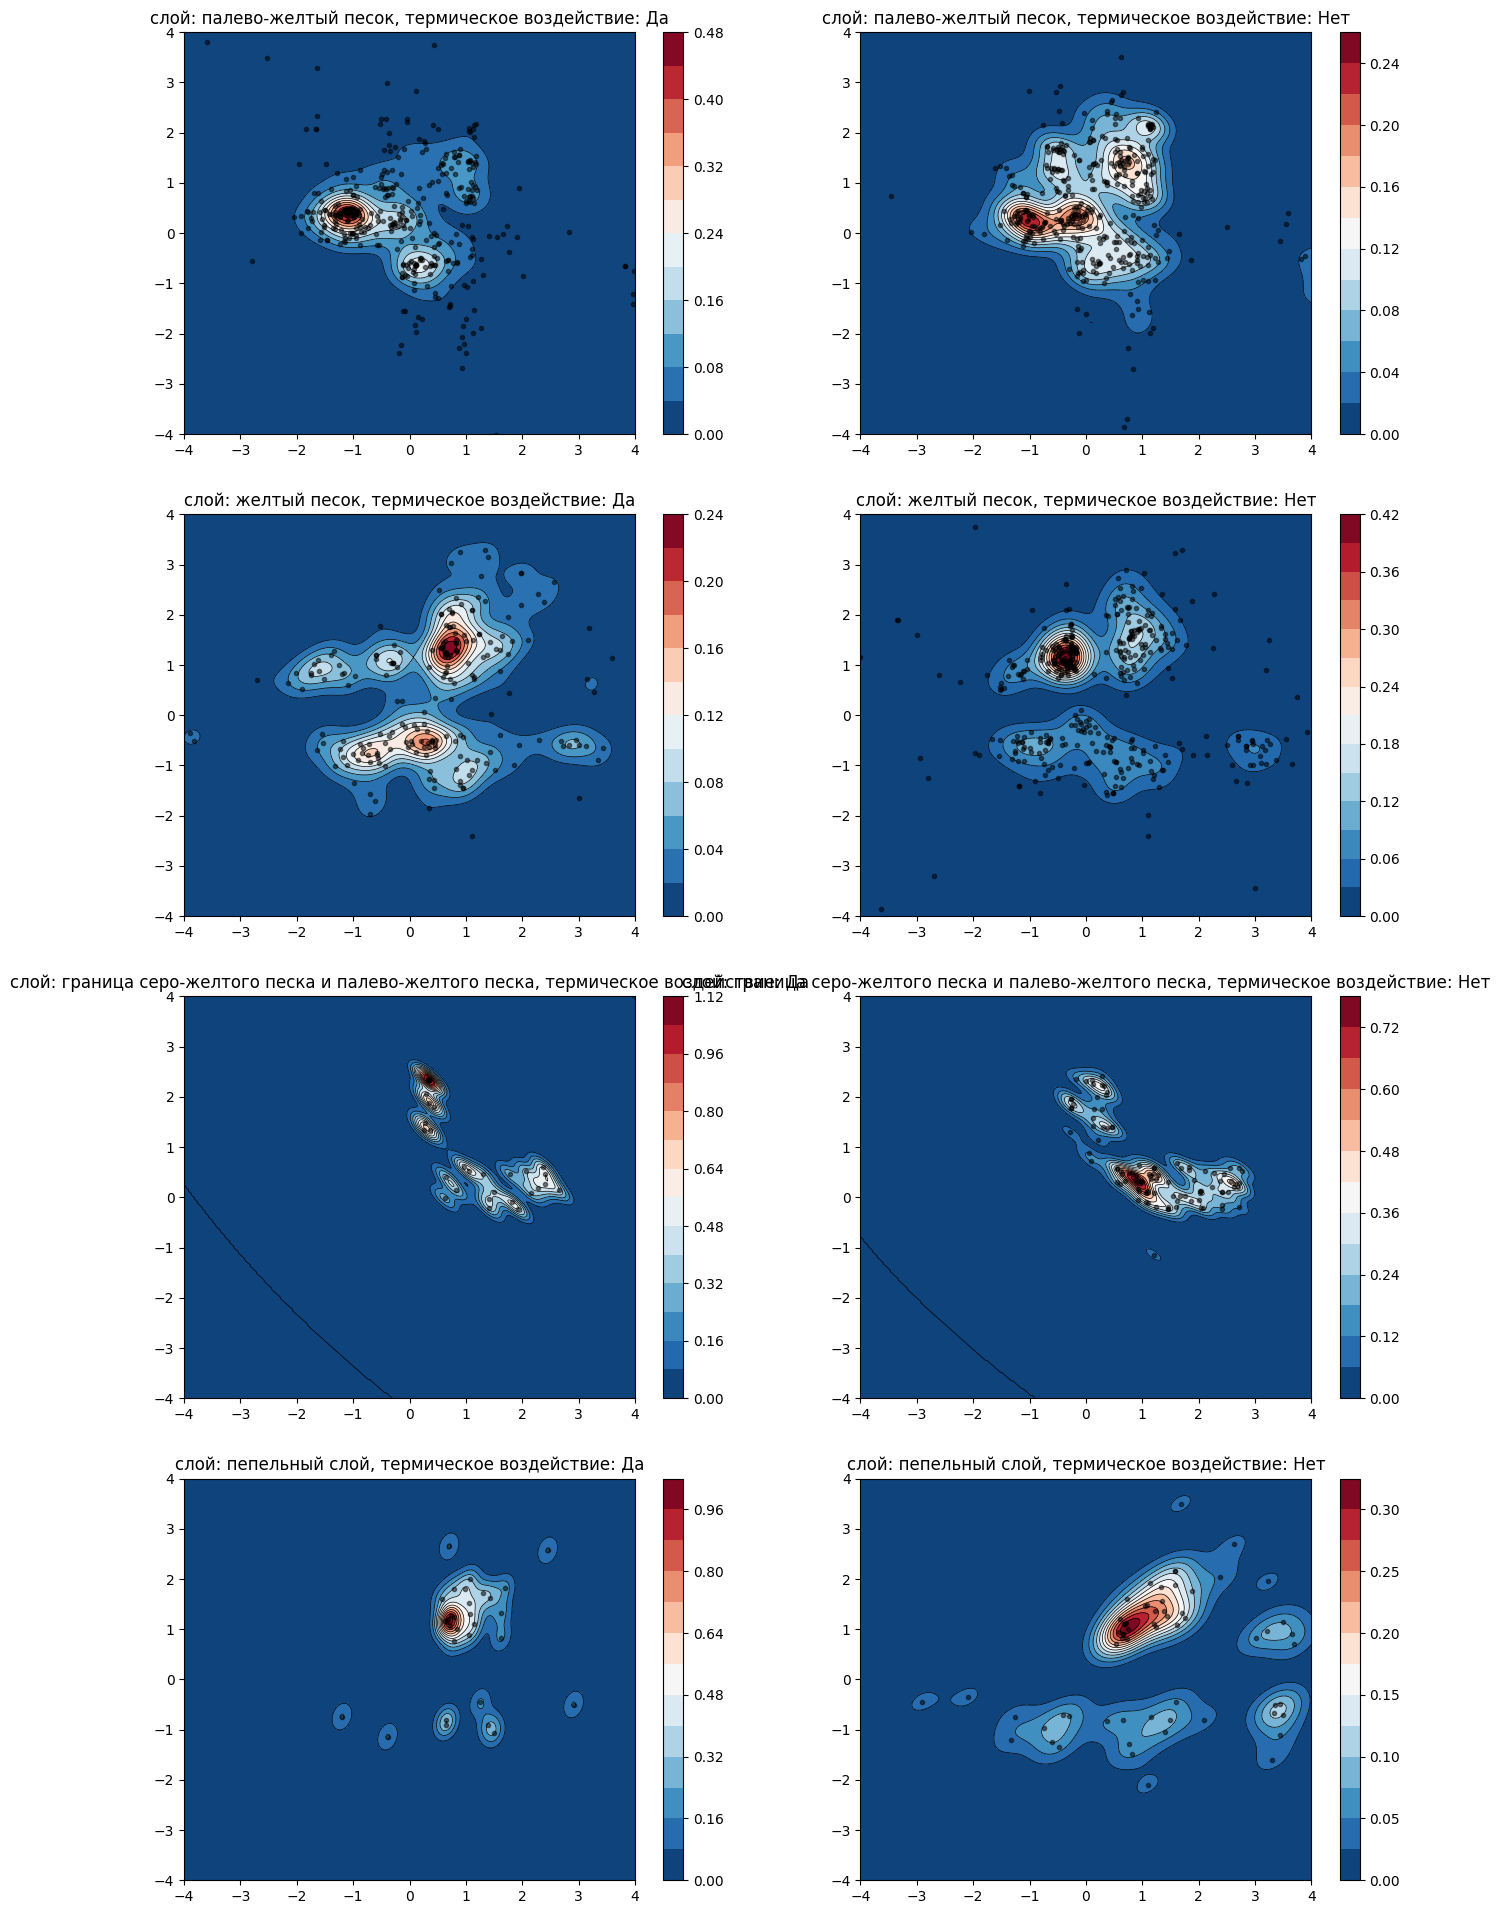

In [ ]:
xs = np.linspace(-4, 4, 300)
ys = np.linspace(-4, 4, 300)
fig, axes = compare_groups_kde(df_coord,
                           group_col='слой', n_groups=4,
                           subgroup_col='термическое воздействие', n_subgroups=2,
                           bw=0.2, xs=xs, ys=ys,
                           n_cols=2, rowh=6, colw=8,
                           plot_points=True, n_points=400)

fig.savefig("/content/drive/MyDrive/ColabNotebooks/" \
            "Archaeology_of_the_settlement_site/Plots/kde_2d/" \
            "layer_thermal.png")
fig.show()

100%|██████████| 500/500 [02:09<00:00,  3.85it/s]


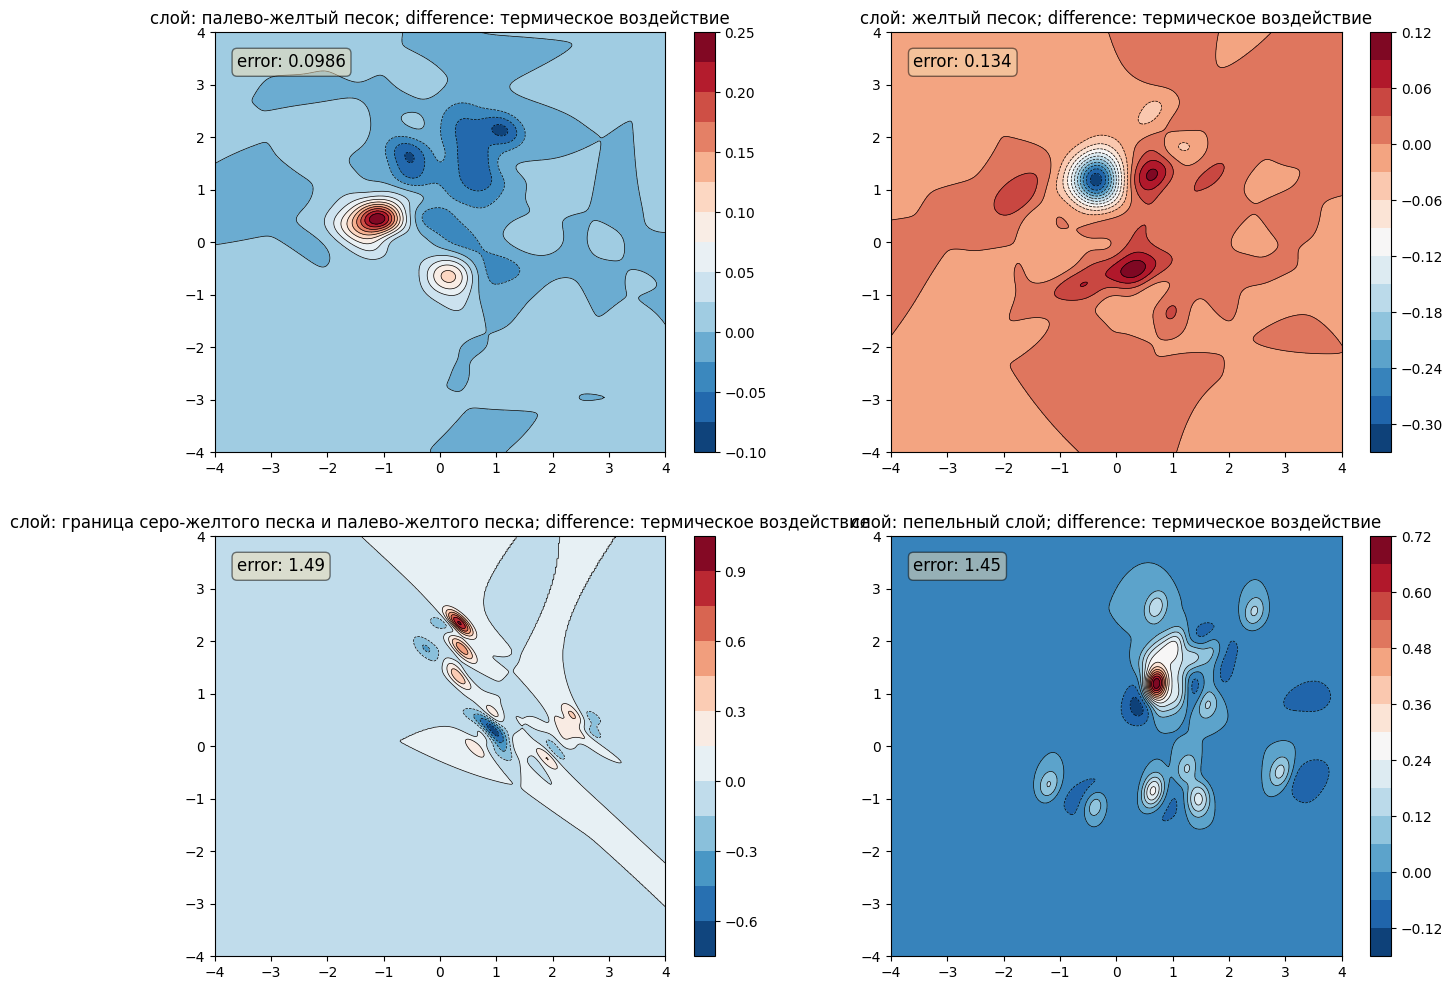

In [ ]:
xs = np.linspace(-4, 4, 300)
ys = np.linspace(-4, 4, 300)

fig, axes = compare_groups_kde_diff(df_coord,
                                    group_col='слой', n_groups=4,
                                    subgroup_col='термическое воздействие',
                                    bw=0.2, xs=xs, ys=ys,
                                    n_cols=2, rowh=6, colw=8,
                                    bootstrap=True, n_resamples=500, confidence_level=0.95)

fig.savefig("/content/drive/MyDrive/ColabNotebooks/" \
            "Archaeology_of_the_settlement_site/Plots/kde_2d/" \
            "layer_thermal_diff.png")
fig.show()

#### Однородность по категории

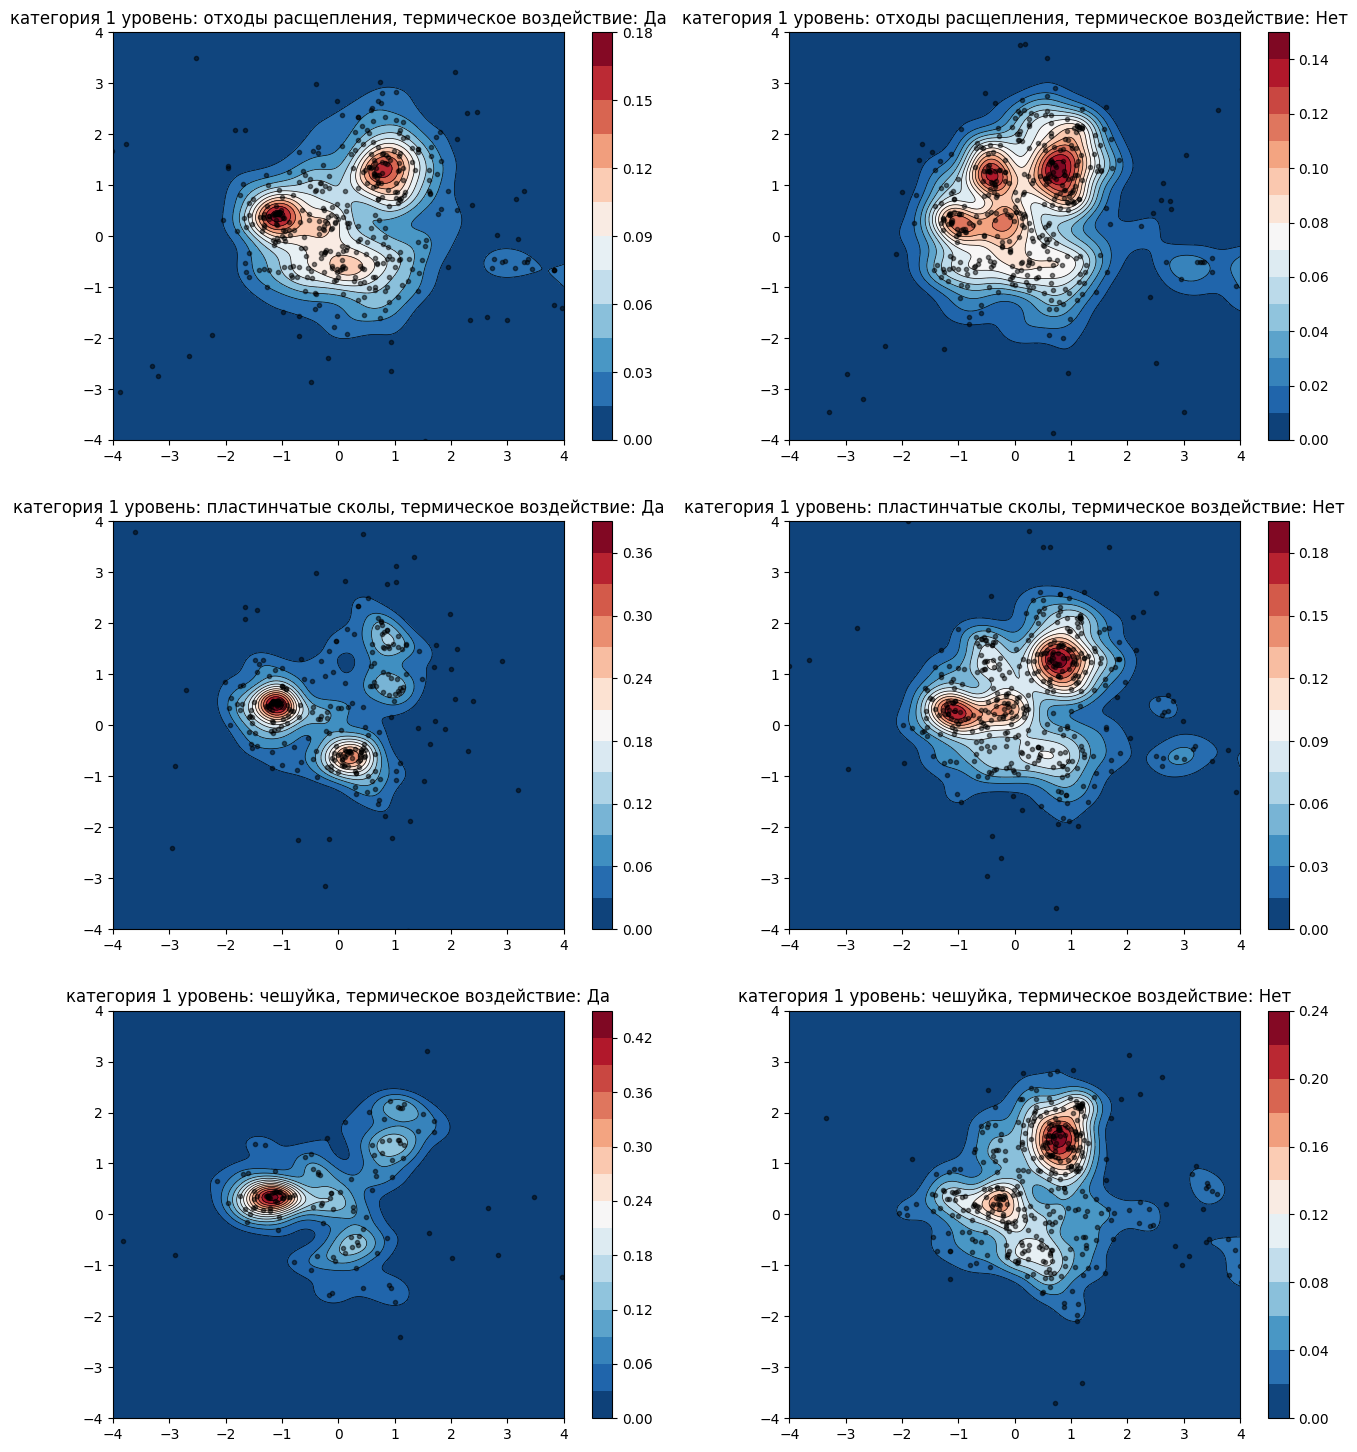

In [ ]:
xs = np.linspace(-4, 4, 300)
ys = np.linspace(-4, 4, 300)
fig, axes = compare_groups_kde(df_coord,
                           group_col='категория 1 уровень', n_groups=3,
                           subgroup_col='термическое воздействие', n_subgroups=2,
                           bw=0.2, xs=xs, ys=ys,
                           n_cols=2, rowh=6, colw=8,
                           plot_points=True, n_points=400)

fig.savefig("/content/drive/MyDrive/ColabNotebooks/" \
            "Archaeology_of_the_settlement_site/Plots/kde_2d/" \
            "cat_thermal.png")
fig.show()

100%|██████████| 500/500 [07:30<00:00,  1.11it/s]


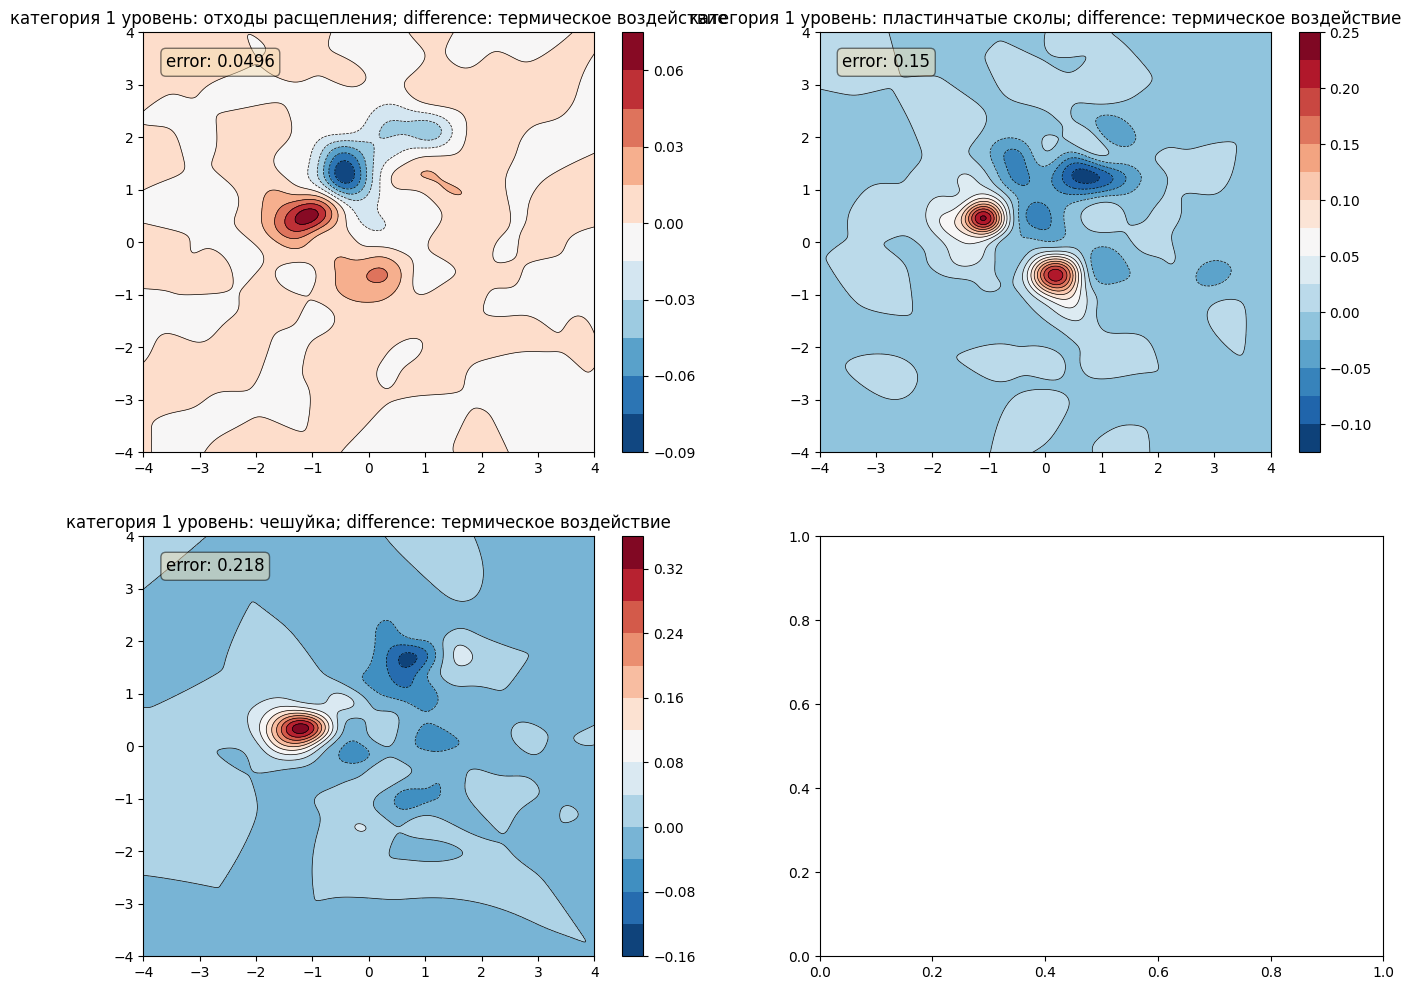

In [ ]:
xs = np.linspace(-4, 4, 300)
ys = np.linspace(-4, 4, 300)

fig, axes = compare_groups_kde_diff(df_coord,
                                    group_col='категория 1 уровень', n_groups=3,
                                    subgroup_col='термическое воздействие',
                                    bw=0.2, xs=xs, ys=ys,
                                    n_cols=2, rowh=6, colw=8,
                                    bootstrap=True, n_resamples=500, confidence_level=0.95)

fig.savefig("/content/drive/MyDrive/ColabNotebooks/" \
            "Archaeology_of_the_settlement_site/Plots/kde_2d/" \
            "cat_thermal_diff.png")
fig.show()

#### Однородность по сырью

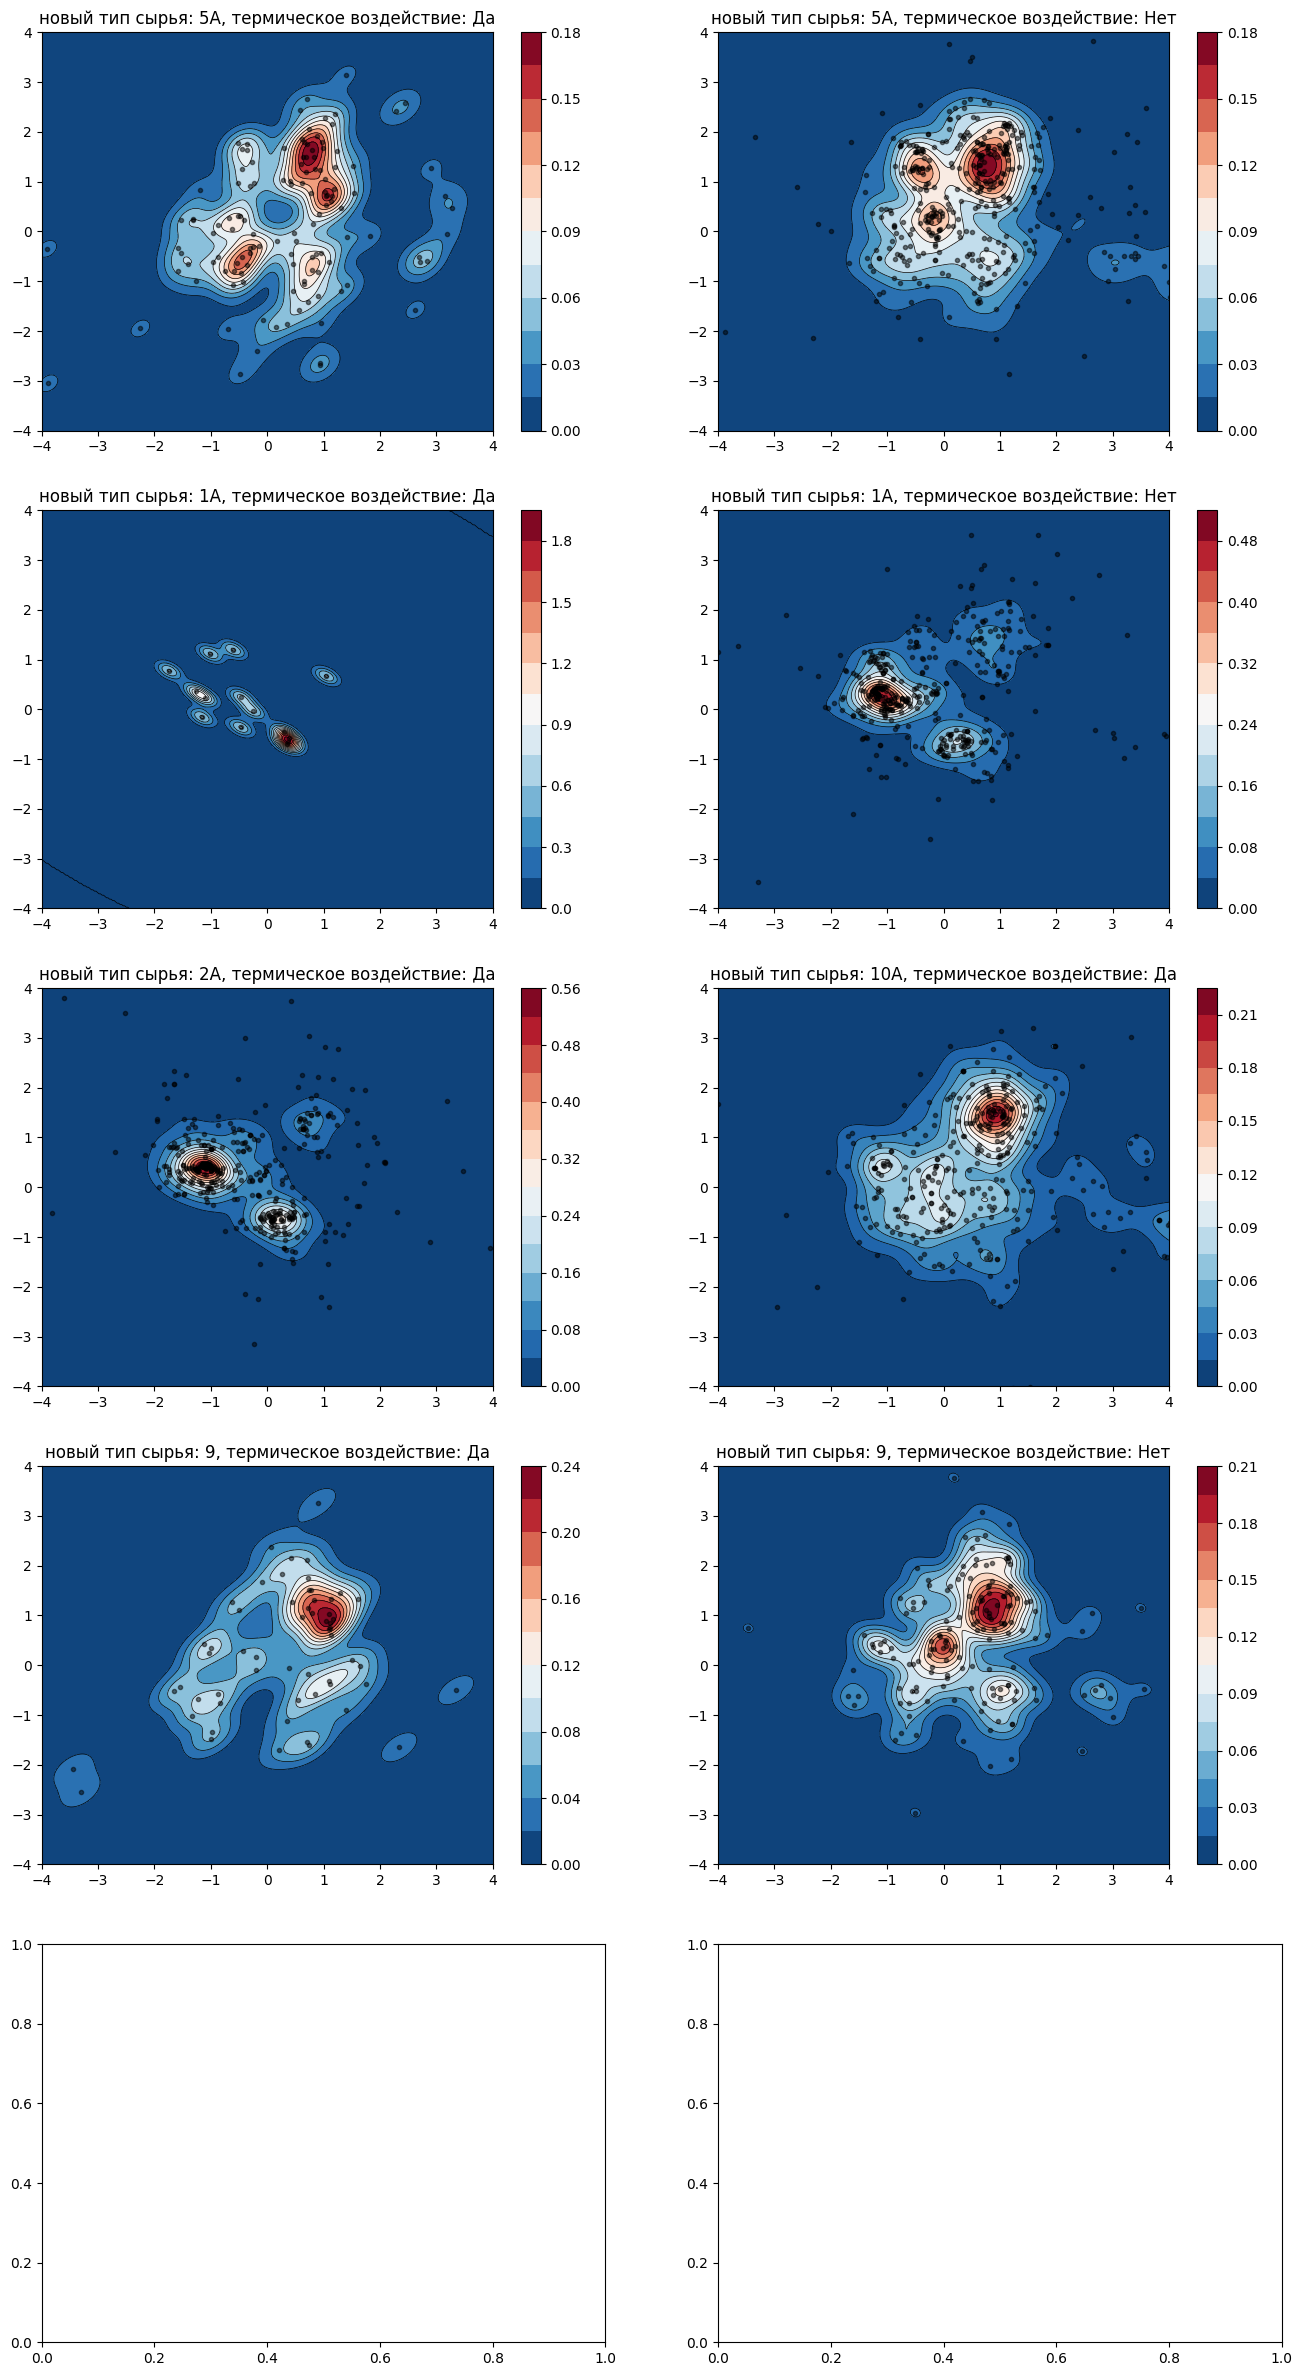

In [ ]:
xs = np.linspace(-4, 4, 300)
ys = np.linspace(-4, 4, 300)
fig, axes = compare_groups_kde(df_coord,
                           group_col='новый тип сырья', n_groups=5,
                           subgroup_col='термическое воздействие', n_subgroups=2,
                           bw=0.2, xs=xs, ys=ys,
                           n_cols=2, rowh=6, colw=8,
                           plot_points=True, n_points=400)

fig.savefig("/content/drive/MyDrive/ColabNotebooks/" \
            "Archaeology_of_the_settlement_site/Plots/kde_2d/" \
            "materials_thermal.png")
fig.show()

100%|██████████| 500/500 [03:45<00:00,  2.21it/s]


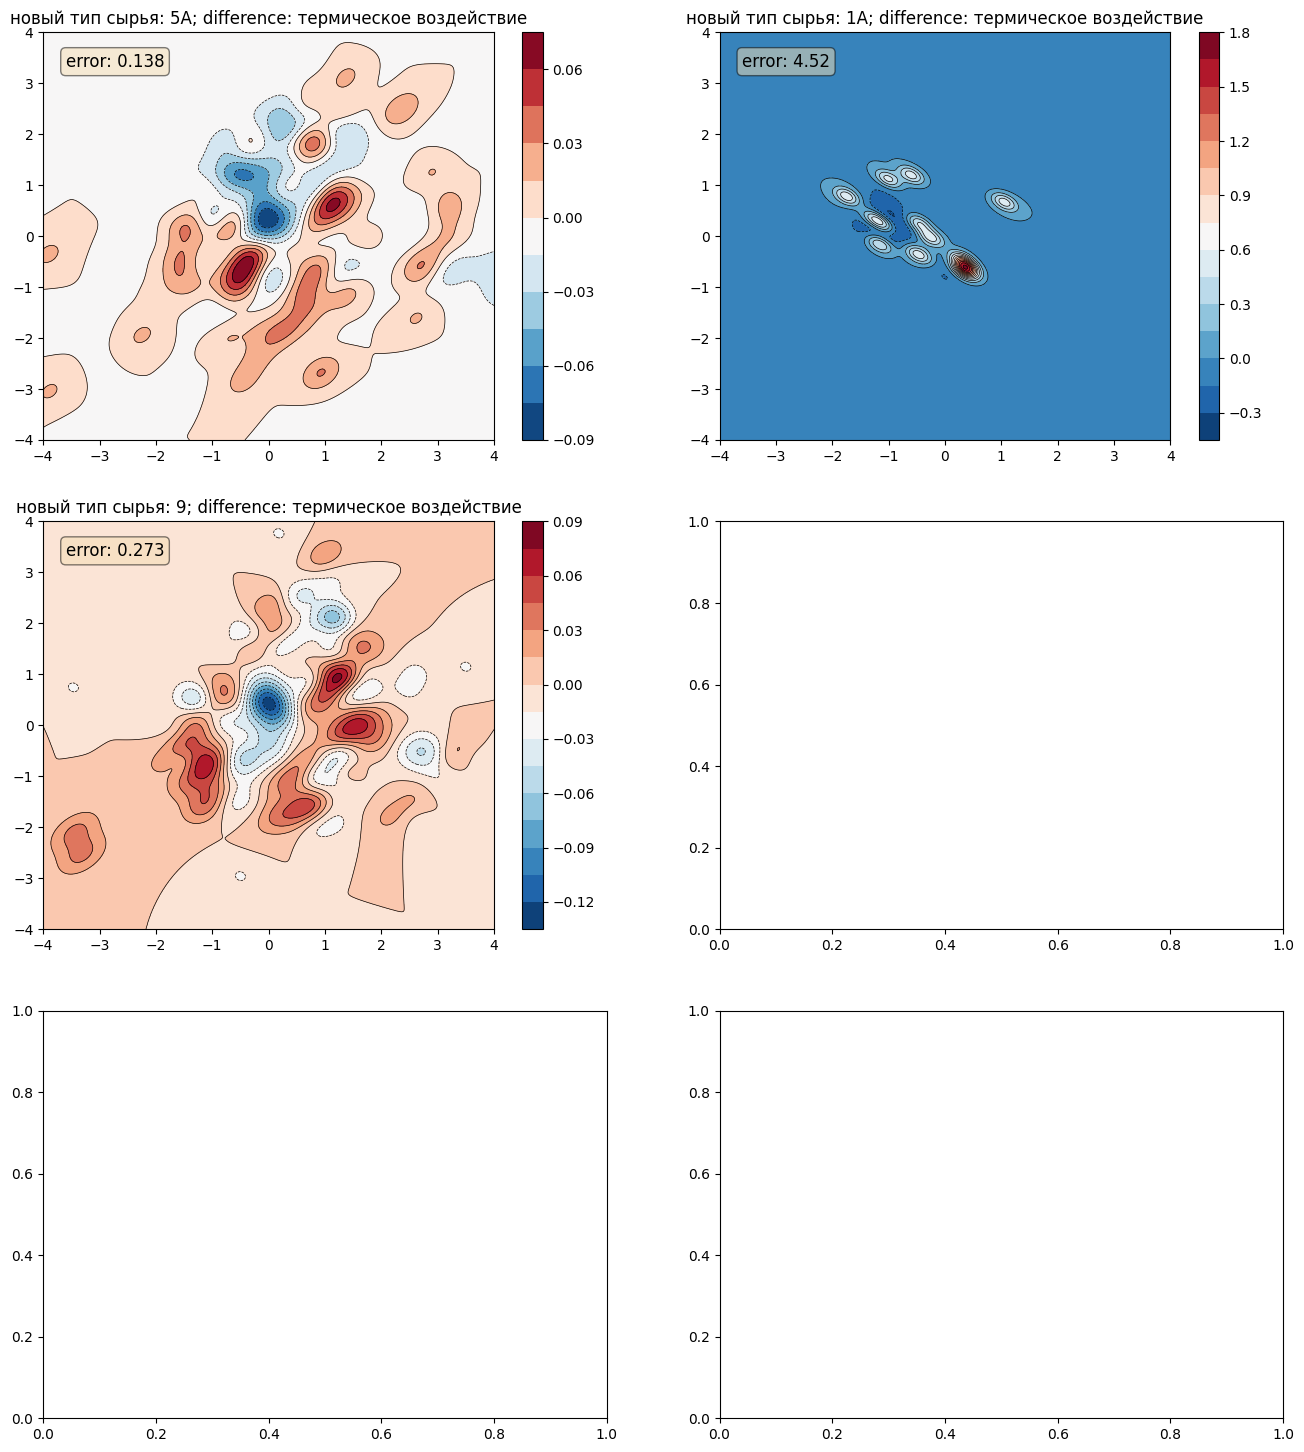

In [ ]:
xs = np.linspace(-4, 4, 300)
ys = np.linspace(-4, 4, 300)

fig, axes = compare_groups_kde_diff(df_coord,
                                    group_col='новый тип сырья', n_groups=5,
                                    subgroup_col='термическое воздействие',
                                    bw=0.2, xs=xs, ys=ys,
                                    n_cols=2, rowh=6, colw=8,
                                    bootstrap=True, n_resamples=500, confidence_level=0.95)

fig.savefig("/content/drive/MyDrive/ColabNotebooks/" \
            "Archaeology_of_the_settlement_site/Plots/kde_2d/" \
            "materials_thermal_diff.png")
fig.show()

#### Трёхмерные

In [ ]:
def in_hull(p, hull):
    """
    Test if points in `p` are in `hull`

    `p` should be a `NxK` coordinates of `N` points in `K` dimensions
    `hull` is either a scipy.spatial.Delaunay object or the `MxK` array of the
    coordinates of `M` points in `K`dimensions for which Delaunay triangulation
    will be computed
    """
    if not isinstance(hull, Delaunay):
        hull = Delaunay(hull)

    return hull.find_simplex(p) >= 0

In [ ]:
df_coord_h = df.dropna(subset=['x(мм)', 'y(мм)', 'h(мм)'])
df_coord_h.loc[:, 'h(мм)'] *= 5000 / 700
df_coord_h.loc[:, ['x(мм)', 'y(мм)', 'h(мм)']] /= 1000

In [ ]:
fig = px.scatter_3d(
    df_coord_h,
    x='x(мм)', y='y(мм)', z='h(мм)',
    color='слой', color_discrete_map=layer_color_map,
    hover_data=['категория 1 уровень', 'термическое воздействие', 'новый тип сырья']
)
fig.update_layout(
    width=1250,
    height=900,
    legend=dict(font=dict(size=15), itemsizing='constant'),
)
fig.update_traces(marker_size=3)
fig.update_scenes(aspectmode='data')

fig.write_html("/content/drive/MyDrive/ColabNotebooks/" \
               "Archaeology_of_the_settlement_site/Plots/kde_3d/" \
               "homogeneous_coordinates.html")
fig.show()

In [ ]:
thermal_color_map = {'Да': "red", "Нет": "blue"}

fig = px.scatter_3d(
    df_coord_h,
    x='x(мм)', y='y(мм)', z='h(мм)',
    color='термическое воздействие', color_discrete_map=thermal_color_map,
    hover_data=['категория 1 уровень', 'термическое воздействие', 'новый тип сырья']
)
fig.update_layout(
    width=1250,
    height=900,
    legend=dict(font=dict(size=15), itemsizing='constant')
)
fig.update_traces(marker_size=3)
fig.update_scenes(aspectmode='data')


fig.write_html("/content/drive/MyDrive/ColabNotebooks/" \
               "Archaeology_of_the_settlement_site/Plots/kde_3d/" \
               "homogeneous_coordinates_thermal.html")
fig.show()

In [ ]:
def kde_3d_fit_predict(X, bw, xs, ys, hs):
    model = st.gaussian_kde(X.T, bw_method=bw)
    x, y, h = np.meshgrid(xs, ys, hs)
    grid = np.column_stack((x.ravel(), y.ravel(), h.ravel()))
    z = model.evaluate(grid.T).reshape(ys.size, xs.size, hs.size)
    return x, y, h, z

In [ ]:
def compare_groups_kde_diff_3d(df, group_col, group_name, subgroup_col,
                               bw, xs, ys, hs,
                               n_resamples=100, confidence_level=0.95,
                               pbar=True):
    '''
    subgroup_col должна быть бинарной
    '''
    _subgroups = df[df[group_col] == group_name].groupby(subgroup_col, sort=True)
    subgroup_names, subgroups = zip(*_subgroups)
    assert(len(subgroups) == 2)
    X = [None, None]
    z = [None, None]
    for i in range(2):
        X[i] = subgroups[i][['x(мм)', 'y(мм)', 'h(мм)']].to_numpy()
        x, y, h, z[i] = kde_3d_fit_predict(X[i], bw, xs, ys, hs)
    z = z[0] - z[1]
    error = kde_diff_confidence_band(X[0], X[1], bw, diff=z.ravel(),
                                     grid=np.column_stack((x.ravel(), y.ravel(), h.ravel())),
                                     n_resamples=n_resamples,
                                     confidence_level=confidence_level,
                                     pbar=pbar)
    return x, y, h, z, error

###### Палево-желтый песок

In [ ]:
xs = np.linspace(-4, 4, 100)
ys = np.linspace(-4, 4, 100)
hs = np.linspace(-5.5, 2, 100)

x, y, h, dens, error = compare_groups_kde_diff_3d(
    df_coord_h,
    "слой", "палево-желтый песок",
    "термическое воздействие",
    bw=0.2, xs=xs, ys=ys, hs=hs,
    n_resamples=300, confidence_level=0.95
)

100%|██████████| 300/300 [4:36:44<00:00, 55.35s/it]


In [ ]:
is_sgn = (np.abs(dens) > error)

fig = px.scatter_3d(
    x=x[is_sgn],
    y=y[is_sgn],
    z=h[is_sgn],
    color=dens[is_sgn]>0,
    color_discrete_map={True: 'red', False: 'blue'},
)
fig.update_layout(
    width=1250,
    height=900,
    legend=dict(font=dict(size=15), itemsizing='constant')
)
fig.update_traces(marker_size=3)
fig.update_scenes(aspectmode='data')

fig.write_html("/content/drive/MyDrive/ColabNotebooks/" \
               "Archaeology_of_the_settlement_site/Plots/kde_3d/" \
               "palevo_zheltyj_pesok.html")
fig.show()

Спасаем неловкое положение

In [ ]:
path = "/content/drive/MyDrive/ColabNotebooks/" \
       "Archaeology_of_the_settlement_site/Storage/kde_3d/palevo_zheltyj_pesok.npz"
loaded_data = np.load(path)
x, y, z = loaded_data['x'], loaded_data['y'], loaded_data['z']
x *= 1000
y *= 1000
z *= 700/5000*1000

In [ ]:
fig = px.scatter_3d(
    x=x,
    y=y,
    z=z,
    color_discrete_sequence=['red'],
    range_z=(-100, 100),
)
fig.update_layout(
    width=1250,
    height=900,
    legend=dict(font=dict(size=15), itemsizing='constant')
)
fig.update_traces(marker_size=3)
fig.update_scenes(aspectmode='auto')

fig.write_html("/content/drive/MyDrive/ColabNotebooks/" \
               "Archaeology_of_the_settlement_site/Plots/kde_3d/" \
               "palevo_zheltyj_pesok_2.html")
fig.show()

In [ ]:
df_pz_3d = df[df['слой'] == 'палево-желтый песок'].\
              dropna(subset=['x(мм)', 'y(мм)', 'h(мм)'])
data_pts = df_pz_3d[['x(мм)', 'y(мм)', 'h(мм)']].to_numpy()

In [ ]:
pts = np.c_[x, y, z]
is_big = (x < -500)
hull_big = Delaunay(pts[is_big])
hull_small = Delaunay(pts[~is_big])
in_hull_big = np.apply_along_axis(in_hull, 1, data_pts, hull_big)
in_hull_small = np.apply_along_axis(in_hull, 1, data_pts, hull_small)
is_hot = (in_hull_big | in_hull_small)

In [ ]:
df_pz_3d.loc[is_hot, :]['термическое воздействие'].value_counts()

термическое воздействие
Да     106
Нет     98
Name: count, dtype: int64

In [ ]:
fig = px.scatter_3d(
    df_pz_3d,
    x='x(мм)', y='y(мм)', z='h(мм)',
    size=np.where(is_hot, 0.25, 0.05),
    color=is_hot, color_discrete_map={True: 'red', False: '#90AD1C'},
    hover_data=['категория 1 уровень', 'термическое воздействие', 'новый тип сырья']
)
fig.update_layout(
    width=1250,
    height=900,
    legend=dict(font=dict(size=15), itemsizing='constant'),
    scene=dict(zaxis=dict(range=[-650, 250])),
)
fig.update_traces(marker_line=dict(width=0))
fig.update_scenes(aspectmode='auto')

fig.write_html("/content/drive/MyDrive/ColabNotebooks/" \
               "Archaeology_of_the_settlement_site/Plots/kde_3d/" \
               "palevo_zheltyj_pesok_4.html")
fig.show()

###### Желтый песок

In [ ]:
xs = np.linspace(-3, 4, 100)
ys = np.linspace(-2.4, 3.5, 100)
hs = np.linspace(-1.9, 4.5, 100)

np.random.seed(1312)
x, y, h, dens, error = compare_groups_kde_diff_3d(
    df_coord_h,
    "слой", "желтый песок",
    "термическое воздействие",
    bw=0.2, xs=xs, ys=ys, hs=hs,
    n_resamples=300, confidence_level=0.95
)

100%|██████████| 300/300 [1:08:04<00:00, 13.61s/it]


In [ ]:
filename = "/content/drive/MyDrive/ColabNotebooks/"\
           "Archaeology_of_the_settlement_site/Storage/kde_3d/"\
           "zheltyj_pesok"
np.savez(filename, x=x, y=y, h=h, dens=dens, error=np.array([error]))

In [ ]:
filename = "/content/drive/MyDrive/ColabNotebooks/"\
           "Archaeology_of_the_settlement_site/Storage/kde_3d/"\
           "zheltyj_pesok.npz"
loaded_data = np.load(filename)
x, y, z = loaded_data['x'], loaded_data['y'], loaded_data['h']
dens = loaded_data['dens']
error = loaded_data['error'][0]
is_sgn = (np.abs(dens) > error)

In [ ]:
fig = px.scatter_3d(
    x=x[is_sgn],
    y=y[is_sgn],
    z=z[is_sgn],
    color=dens[is_sgn]>0,
    color_discrete_map={True: 'red', False: 'blue'},
)
fig.update_layout(
    width=1250,
    height=900,
    legend=dict(font=dict(size=15), itemsizing='constant')
)
fig.update_traces(marker_size=3)
fig.update_scenes(aspectmode='auto')

fig.write_html("/content/drive/MyDrive/ColabNotebooks/" \
               "Archaeology_of_the_settlement_site/Plots/kde_3d/" \
               "zheltyj_pesok_1.html")
fig.show()

In [ ]:
x = x[is_sgn] * 1000
y = y[is_sgn] * 1000
z = z[is_sgn] * 700/5000 * 1000

In [ ]:
df_z_3d = df[df['слой'] == 'желтый песок'].\
              dropna(subset=['x(мм)', 'y(мм)', 'h(мм)'])
data_pts = df_z_3d[['x(мм)', 'y(мм)', 'h(мм)']].to_numpy()

In [ ]:
pts = np.c_[x, y, z]
is_big = (y > 0)
hull_big = Delaunay(pts[is_big])
is_cold = np.apply_along_axis(in_hull, 1, data_pts, hull_big)

In [ ]:
df_z_3d.loc[is_cold, :]['термическое воздействие'].value_counts()

термическое воздействие
Нет    56
Да      1
Name: count, dtype: int64

In [ ]:
fig = px.scatter_3d(
    df_z_3d,
    x='x(мм)', y='y(мм)', z='h(мм)',
    size=np.where(is_cold, 0.25, 0.05),
    color=is_cold, color_discrete_map={True: 'blue', False: '#90AD1C'},
    hover_data=['категория 1 уровень', 'термическое воздействие', 'новый тип сырья']
)
fig.update_layout(
    width=1250,
    height=900,
    legend=dict(font=dict(size=15), itemsizing='constant'),
)
fig.update_traces(marker_line=dict(width=0))
fig.update_scenes(aspectmode='auto')

fig.write_html("/content/drive/MyDrive/ColabNotebooks/" \
               "Archaeology_of_the_settlement_site/Plots/kde_3d/" \
               "zheltyj_pesok_2.html")
fig.show()

###### Отходы расщепления

In [ ]:
xs = np.linspace(-6.6, 5, 100)
ys = np.linspace(-6.4, 4.3, 100)
hs = np.linspace(-4.43, 4.43, 100)

np.random.seed(1312)
x, y, h, dens, error = compare_groups_kde_diff_3d(
    df_coord_h,
    "категория 1 уровень", "отходы расщепления",
    "термическое воздействие",
    bw=0.2, xs=xs, ys=ys, hs=hs,
    n_resamples=300, confidence_level=0.95
)

100%|██████████| 300/300 [5:28:13<00:00, 65.65s/it]


In [ ]:
filename = "/content/drive/MyDrive/ColabNotebooks/"\
           "Archaeology_of_the_settlement_site/Storage/kde_3d/"\
           "oth_raschepl"
np.savez(filename, x=x, y=y, h=h, dens=dens, error=np.array([error]))

In [ ]:
filename = "/content/drive/MyDrive/ColabNotebooks/"\
           "Archaeology_of_the_settlement_site/Storage/kde_3d/"\
           "oth_raschepl.npz"
loaded_data = np.load(filename)
x, y, z = loaded_data['x'], loaded_data['y'], loaded_data['h']
dens = loaded_data['dens']
error = loaded_data['error'][0]
is_sgn = (np.abs(dens) > error)

In [ ]:
fig = px.scatter_3d(
    x=x[is_sgn],
    y=y[is_sgn],
    z=z[is_sgn],
    color=dens[is_sgn]>0,
    color_discrete_map={True: 'red', False: 'blue'},
)
fig.update_layout(
    width=1250,
    height=900,
    legend=dict(font=dict(size=15), itemsizing='constant')
)
fig.update_traces(marker_size=3)
fig.update_scenes(aspectmode='auto')

fig.write_html("/content/drive/MyDrive/ColabNotebooks/" \
               "Archaeology_of_the_settlement_site/Plots/kde_3d/" \
               "oth_raschepl.html")
fig.show()

In [ ]:
clear = (z < 1)
x = x[is_sgn & clear] * 1000
y = y[is_sgn & clear] * 1000
z = z[is_sgn & clear] * 700/5000 * 1000

In [ ]:
df_otr_3d = df[df['категория 1 уровень'] == 'отходы расщепления'].\
              dropna(subset=['x(мм)', 'y(мм)', 'h(мм)'])
data_pts = df_otr_3d[['x(мм)', 'y(мм)', 'h(мм)']].to_numpy()

Оказалось, что синих точек недостаточно для того, чтобы выпуклая оболочка содержала находки, поэтому делаем из них куб.

In [ ]:
pts = np.c_[x, y, z]
is_hot = (y < 1000)
g = np.meshgrid(x[~is_hot], y[~is_hot], z[~is_hot])
new_pts = np.vstack(tuple(map(np.ravel, g))).T
pts = np.vstack((pts, new_pts))
pts = np.unique(pts, axis=0)
pts.shape

(119, 3)

In [ ]:
is_hot = (pts[:, 1] < 1000)
hull_hot = Delaunay(pts[is_hot])
hull_cold = Delaunay(pts[~is_hot])
in_hull_hot = np.apply_along_axis(in_hull, 1, data_pts, hull_hot)
in_hull_cold = np.apply_along_axis(in_hull, 1, data_pts, hull_cold)
is_sz = (in_hull_hot | in_hull_cold)
color = np.where(in_hull_hot, 'hot', '-')
color = np.where(in_hull_cold, 'cold', color)

In [ ]:
fig = px.scatter_3d(
    df_otr_3d,
    x='x(мм)', y='y(мм)', z='h(мм)',
    size=np.where(is_sz, 0.25, 0.05),
    color=color, color_discrete_map={'hot': 'red', 'cold': 'blue', '-': '#90AD1C'},
    hover_data=['категория 1 уровень', 'термическое воздействие', 'новый тип сырья']
)
fig.update_layout(
    width=1250,
    height=900,
    legend=dict(font=dict(size=15), itemsizing='constant'),
    scene=dict(zaxis=dict(range=[-650, 610])),
)
fig.update_traces(marker_line=dict(width=0))
fig.update_scenes(aspectmode='auto')

fig.write_html("/content/drive/MyDrive/ColabNotebooks/" \
               "Archaeology_of_the_settlement_site/Plots/kde_3d/" \
               "oth_raschepl_2.html")
fig.show()

###### Пластинчатые сколы

In [ ]:
xs = np.linspace(-3.1, 5, 100)
ys = np.linspace(-4.25, 4, 100)
hs = np.linspace(-4.5, 5.3, 100)

np.random.seed(1312)
x, y, h, dens, error = compare_groups_kde_diff_3d(
    df_coord_h,
    "категория 1 уровень", "пластинчатые сколы",
    "термическое воздействие",
    bw=0.2, xs=xs, ys=ys, hs=hs,
    n_resamples=300, confidence_level=0.95
)

100%|██████████| 300/300 [1:39:42<00:00, 19.94s/it]


In [ ]:
filename = "/content/drive/MyDrive/ColabNotebooks/"\
           "Archaeology_of_the_settlement_site/Storage/kde_3d/"\
           "plast_skol"
np.savez(filename, x=x, y=y, h=h, dens=dens, error=np.array([error]))

In [ ]:
filename = "/content/drive/MyDrive/ColabNotebooks/"\
           "Archaeology_of_the_settlement_site/Storage/kde_3d/"\
           "plast_skol.npz"
loaded_data = np.load(filename)
x, y, z = loaded_data['x'], loaded_data['y'], loaded_data['h']
dens = loaded_data['dens']
error = loaded_data['error'][0]
is_sgn = (np.abs(dens) > error)

In [ ]:
fig = px.scatter_3d(
    x=x[is_sgn],
    y=y[is_sgn],
    z=z[is_sgn],
    color=dens[is_sgn]>0,
    color_discrete_map={True: 'red', False: 'blue'},
)
fig.update_layout(
    width=1250,
    height=900,
    legend=dict(font=dict(size=15), itemsizing='constant')
)
fig.update_traces(marker_size=3)
fig.update_scenes(aspectmode='auto')

fig.write_html("/content/drive/MyDrive/ColabNotebooks/" \
               "Archaeology_of_the_settlement_site/Plots/kde_3d/" \
               "plast_skol.html")
fig.show()

In [ ]:
x = x[is_sgn] * 1000
y = y[is_sgn] * 1000
z = z[is_sgn] * 700/5000 * 1000

In [ ]:
df_ps_3d = df[df['категория 1 уровень'] == 'пластинчатые сколы'].\
              dropna(subset=['x(мм)', 'y(мм)', 'h(мм)'])
data_pts = df_ps_3d[['x(мм)', 'y(мм)', 'h(мм)']].to_numpy()

In [ ]:
pts = np.c_[x, y, z]
is_big = (x < -400)
hull_big = Delaunay(pts[is_big])
hull_small = Delaunay(pts[~is_big])
in_hull_big = np.apply_along_axis(in_hull, 1, data_pts, hull_big)
in_hull_small = np.apply_along_axis(in_hull, 1, data_pts, hull_small)
is_hot = (in_hull_big | in_hull_small)

In [ ]:
df_ps_3d.loc[is_hot, :]['термическое воздействие'].value_counts()

термическое воздействие
Да     33
Нет    26
Name: count, dtype: int64

In [ ]:
fig = px.scatter_3d(
    df_ps_3d,
    x='x(мм)', y='y(мм)', z='h(мм)',
    size=np.where(is_hot, 0.25, 0.05),
    color=is_hot, color_discrete_map={True: 'red', False: '#90AD1C'},
    hover_data=['категория 1 уровень', 'термическое воздействие', 'новый тип сырья']
)
fig.update_layout(
    width=1250,
    height=900,
    legend=dict(font=dict(size=15), itemsizing='constant'),
    # scene=dict(zaxis=dict(range=[-650, 250])),
)
fig.update_traces(marker_line=dict(width=0))
fig.update_scenes(aspectmode='auto')

fig.write_html("/content/drive/MyDrive/ColabNotebooks/" \
               "Archaeology_of_the_settlement_site/Plots/kde_3d/" \
               "plast_skol_2.html")
fig.show()

###### Чешуйки

In [ ]:
xs = np.linspace(-2.17, 4.93, 100)
ys = np.linspace(-2.4, 3.21, 100)
hs = np.linspace(-4.5, 4.29, 100)

np.random.seed(1312)
x, y, h, dens, error = compare_groups_kde_diff_3d(
    df_coord_h,
    "категория 1 уровень", "чешуйка",
    "термическое воздействие",
    bw=0.2, xs=xs, ys=ys, hs=hs,
    n_resamples=300, confidence_level=0.95
)

100%|██████████| 300/300 [47:48<00:00,  9.56s/it]


In [ ]:
filename = "/content/drive/MyDrive/ColabNotebooks/"\
           "Archaeology_of_the_settlement_site/Storage/kde_3d/"\
           "cheshuyki"
np.savez(filename, x=x, y=y, h=h, dens=dens, error=np.array([error]))

In [ ]:
filename = "/content/drive/MyDrive/ColabNotebooks/"\
           "Archaeology_of_the_settlement_site/Storage/kde_3d/"\
           "cheshuyki.npz"
loaded_data = np.load(filename)
x, y, z = loaded_data['x'], loaded_data['y'], loaded_data['h']
dens = loaded_data['dens']
error = loaded_data['error'][0]
is_sgn = (np.abs(dens) > error)

In [ ]:
fig = px.scatter_3d(
    x=x[is_sgn],
    y=y[is_sgn],
    z=z[is_sgn],
    color=dens[is_sgn]>0,
    color_discrete_map={True: 'red', False: 'blue'},
)
fig.update_layout(
    width=1250,
    height=900,
    legend=dict(font=dict(size=15), itemsizing='constant')
)
fig.update_traces(marker_size=3)
fig.update_scenes(aspectmode='auto')

fig.write_html("/content/drive/MyDrive/ColabNotebooks/" \
               "Archaeology_of_the_settlement_site/Plots/kde_3d/" \
               "cheshuyki.html")
fig.show()

In [ ]:
x = x[is_sgn] * 1000
y = y[is_sgn] * 1000
z = z[is_sgn] * 700/5000 * 1000

In [ ]:
df_ch_3d = df[df['категория 1 уровень'] == 'чешуйка'].\
              dropna(subset=['x(мм)', 'y(мм)', 'h(мм)'])
data_pts = df_ch_3d[['x(мм)', 'y(мм)', 'h(мм)']].to_numpy()

In [ ]:
pts = np.c_[x, y, z]
hull = Delaunay(pts)
is_hot = np.apply_along_axis(in_hull, 1, data_pts, hull_big)

In [ ]:
df_ch_3d.loc[is_hot, :]['термическое воздействие'].value_counts()

термическое воздействие
Нет    7
Да     7
Name: count, dtype: int64

In [ ]:
fig = px.scatter_3d(
    df_ch_3d,
    x='x(мм)', y='y(мм)', z='h(мм)',
    size=np.where(is_hot, 0.25, 0.05),
    color=is_hot, color_discrete_map={True: 'red', False: '#90AD1C'},
    hover_data=['категория 1 уровень', 'термическое воздействие', 'новый тип сырья']
)
fig.update_layout(
    width=1250,
    height=900,
    legend=dict(font=dict(size=15), itemsizing='constant'),
)
fig.update_traces(marker_line=dict(width=0))
fig.update_scenes(aspectmode='auto')

fig.write_html("/content/drive/MyDrive/ColabNotebooks/" \
               "Archaeology_of_the_settlement_site/Plots/kde_3d/" \
               "cheshuyki_2.html")
fig.show()